In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Reset pseudo random number generator so that the results are reproducible.
seed = 42

In [3]:
def genTargetFunction(N):
    # Attribute.
    x1 = np.linspace(-3,3,N).reshape(N,1)
    # Create target function.
    y = x1 + 0.5*x1**2
    # Noisy version of the target function.
    y_noisy = y + np.random.randn(N, 1)
    return x1, y_noisy

In [4]:
# Number of examples.
N = 50

# Polinomial degrees to be tested.
degrees = [1, 2, 40]

# Include column of ones once the target function has a bias.
include_bias = True

repetitions = 1000

mse_train = np.zeros((len(degrees), repetitions))
mse_val = np.zeros((len(degrees), repetitions))

for i in range(len(degrees)):
    
    np.random.seed(seed)
    
    for k in range(repetitions):
    
        x1, y_noisy = genTargetFunction(N)

        x1_train, x1_val, y_train, y_val = train_test_split(x1, y_noisy, test_size=0.2, random_state=seed)

        # Instantiate a polynomial with the given degree.
        poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
        # Instantiate a scaler that will standardize the features.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        # Train the polinomial model, i.e., the hypothesis.
        poly_reg.fit(x1_train, y_train)

        # Use the trained model for prediction.
        ypred_train = poly_reg.predict(x1_train)
        ypred_val = poly_reg.predict(x1_val)

        # Calculate the Mean Squared Error (MSE) between target and predicted values.
        mse_train[i][k] = mean_squared_error(y_train, ypred_train)
        mse_val[i][k] = mean_squared_error(y_val, ypred_val)

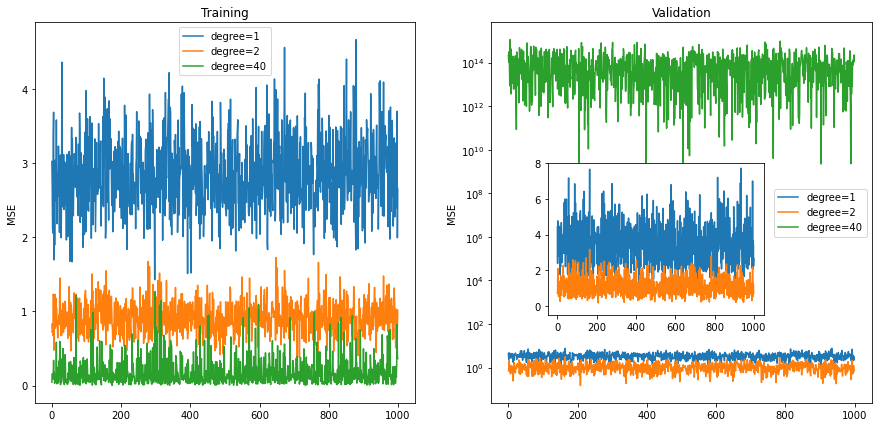

In [22]:
fig = plt.figure(figsize=(15, 7))

ax = plt.subplot(1, 2, 1)
plt.plot(mse_train[0][:], label='degree=1')
plt.plot(mse_train[1][:], label='degree=2')
plt.plot(mse_train[2][:], label='degree=40')
plt.title('Training')
plt.ylabel('MSE')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(mse_val[0][:], label='degree=1')
plt.plot(mse_val[1][:], label='degree=2')
plt.plot(mse_val[2][:], label='degree=40')
plt.yscale('log')
plt.ylabel('MSE')
plt.title('Validation')
plt.legend()

left, bottom, width, height = [0.6, 0.3, 0.2, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(mse_val[0][:], label='degree=1')
ax3.plot(mse_val[1][:], label='degree=2')
ax3.plot(mse_val[2][:], label='degree=40')
ax3.set_ylim(-0.5, 8)

plt.show()

In [6]:
mean_mse_train = []
mean_mse_val = []
var_mse_train = []
var_mse_val = []
for i in range(len(degrees)):
    mean_mse_train.append(np.mean(mse_train[i][:]))
    mean_mse_val.append(np.mean(mse_val[i][:]))
    var_mse_train.append(np.var(mse_train[i][:]))
    var_mse_val.append(np.var(mse_val[i][:]))

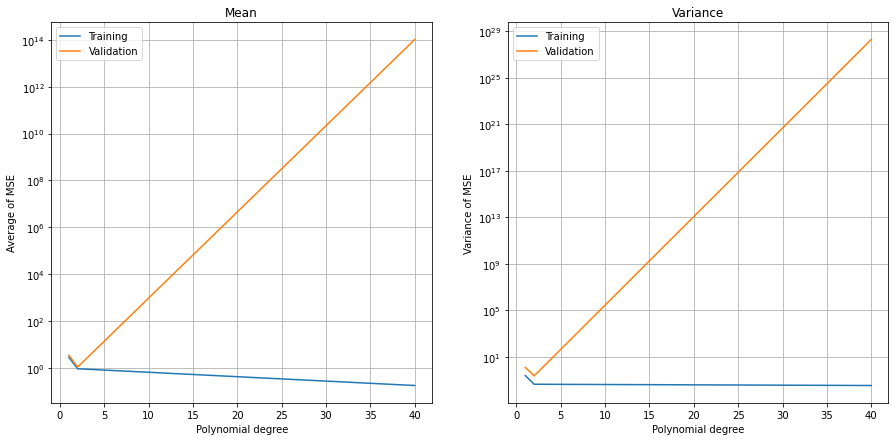

In [23]:
fig = plt.figure(figsize=(15, 7))

ax = plt.subplot(1, 2, 1)
plt.title('Mean')
plt.plot(degrees, mean_mse_train, label='Training')
plt.plot(degrees, mean_mse_val, label='Validation')
plt.ylabel('Average of MSE')
plt.xlabel('Polynomial degree')
plt.yscale('log')
plt.grid()
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(degrees, var_mse_train, label='Training')
plt.plot(degrees, var_mse_val, label='Validation')
plt.title('Variance')
plt.ylabel('Variance of MSE')
plt.xlabel('Polynomial degree')
plt.yscale('log')
plt.grid()
plt.legend()

plt.show()

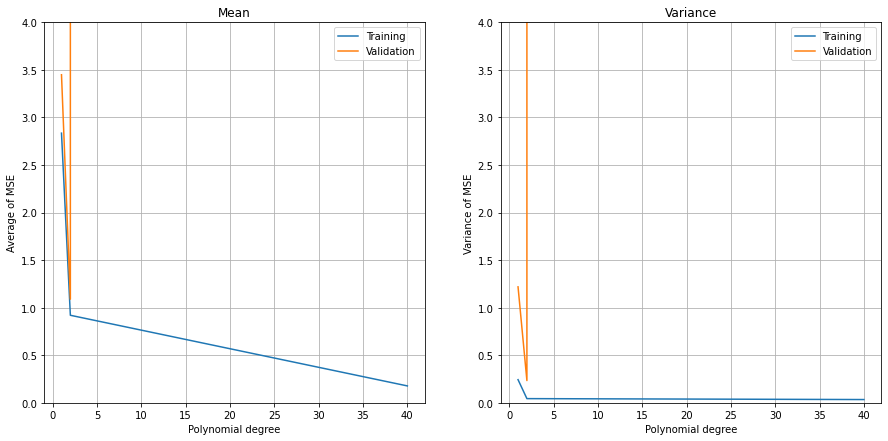

In [29]:
fig = plt.figure(figsize=(15, 7))

ax = plt.subplot(1, 2, 1)
plt.title('Mean')
plt.plot(degrees, mean_mse_train, label='Training')
plt.plot(degrees, mean_mse_val, label='Validation')
plt.ylabel('Average of MSE')
plt.xlabel('Polynomial degree')
plt.ylim(0,4)
plt.grid()
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(degrees, var_mse_train, label='Training')
plt.plot(degrees, var_mse_val, label='Validation')
plt.title('Variance')
plt.ylabel('Variance of MSE')
plt.xlabel('Polynomial degree')
plt.ylim(0,4)
plt.grid()
plt.legend()

plt.show()